In [1]:
import sys
import os
import numpy as np
import SimpleITK as sitk
import matplotlib
import matplotlib.pyplot as plt
from  scipy import ndimage
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from classifier_preparation import *
matplotlib.rcParams.update({'font.size': 12})



# Data Loading

In [2]:
g_images, c_images, g_lof, c_lof = data_loading_normalized()

In [127]:
# checking data shape
'''
print(g_images[0].shape)
print(g_lof[0].shape)
print(g_images[1].shape)
print(g_lof[1].shape)
print(g_images[2].shape)
print(g_lof[2].shape)

print(c_images[0].shape)
print(c_lof[0].shape)
print(c_images[1].shape)
print(c_lof[1].shape)
print(c_images[2].shape)
print(c_lof[2].shape)
'''

(265, 512, 512)
(512,)
(269, 512, 512)
(512,)
(242, 512, 512)
(512,)
(286, 512, 512)
(512,)
(300, 512, 512)
(512,)
(291, 512, 512)
(512,)


# k-NN

In [3]:
nn = train_classifier(g_images, g_lof, True,'knn')

Confusion matrix of :c_40
[[454   2]
 [ 52   4]]
And accuracy of: 0.89453125
Confusion matrix of :c_41
[[468   2]
 [ 39   3]]
And accuracy of: 0.919921875
Confusion matrix of :c_42
[[455   0]
 [ 56   1]]
And accuracy of: 0.890625


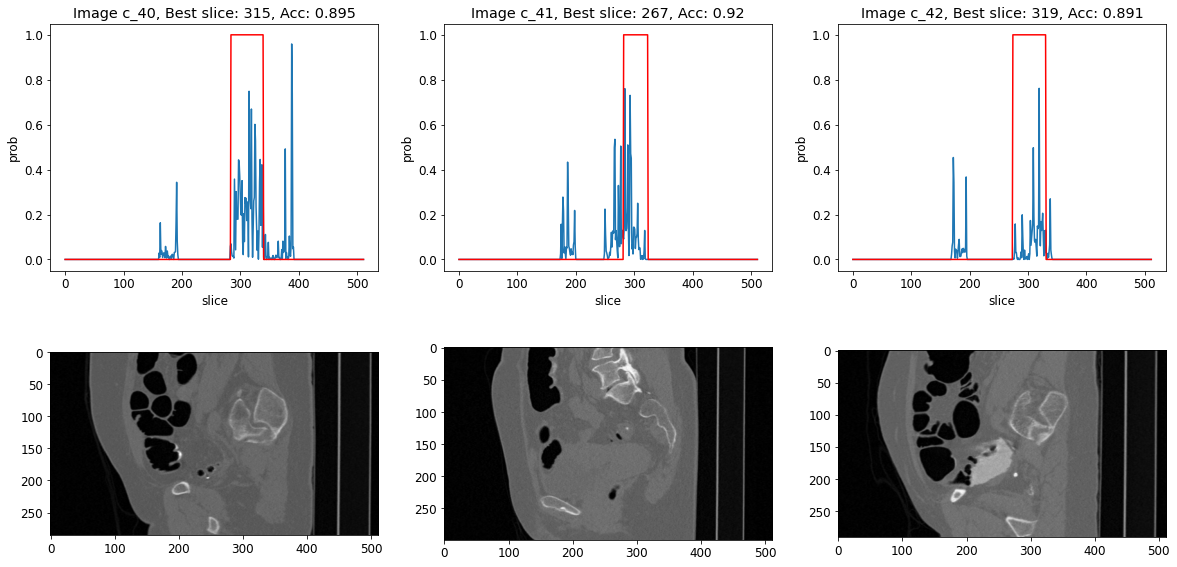

In [4]:
c_list = ['c_40','c_41','c_42']

plt.figure(figsize=(20,10))
for i in range(3):
    X_test = c_images[i]
    y_test = c_lof[i]
    y_preds, y_preds_proba = left_obturator_foramen_selection(X_test, nn, True, y_test)
    best = np.argmax(y_preds)
    acc = metrics.accuracy_score(y_test, y_preds)
    plt.subplot(2,3,i+1)
    plt.plot(y_preds_proba[:,1])
    plt.plot(y_test,'r')#,alpha=0.3)
    plt.xlabel('slice')
    plt.ylabel('prob')
    plt.title('Image '+c_list[i]+ ', Best slice: '+str(best)+', Acc: '+str(round(acc,3)))
    print('Confusion matrix of :'+c_list[i])
    print(metrics.confusion_matrix(y_test, y_preds))
    print('And accuracy of: '+str(acc))
    plt.subplot(2,3,i+4)
    plt.imshow(np.flipud(X_test[:,:,best]),cmap='gray')

#  Random Forest

In [6]:
rf = train_classifier(g_images, g_lof, True,'rf')

Confusion matrix of c_40:
[[456   0]
 [ 39  17]]
And accuracy of: 0.923828125
Confusion matrix of c_41:
[[467   3]
 [ 35   7]]
And accuracy of: 0.92578125
Confusion matrix of c_42:
[[455   0]
 [ 47  10]]
And accuracy of: 0.908203125


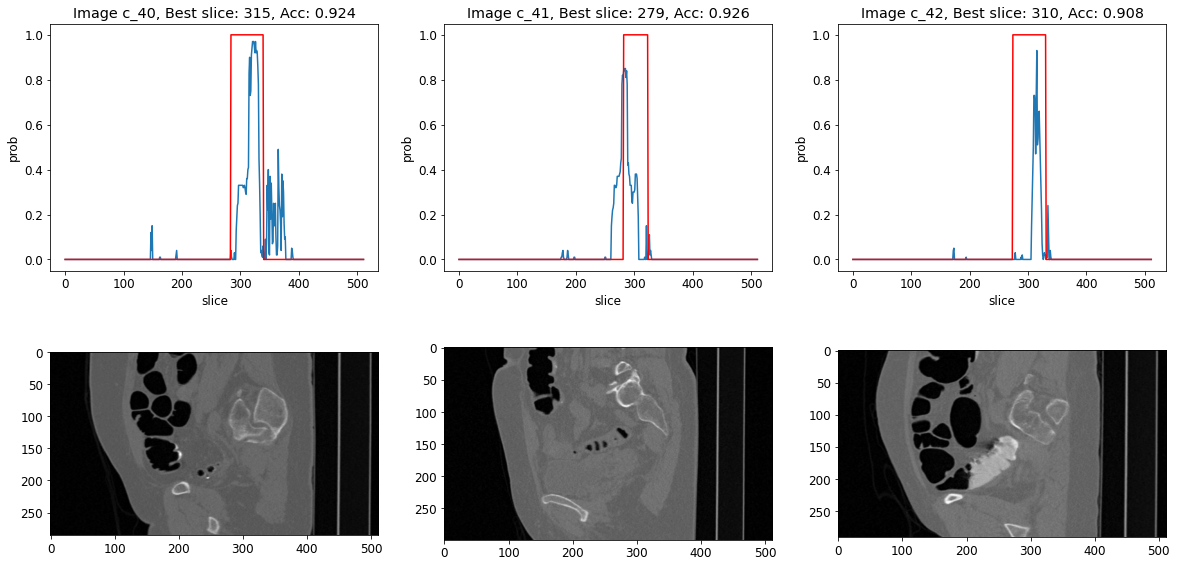

In [7]:
c_list = ['c_40','c_41','c_42']

plt.figure(figsize=(20,10))
for i in range(3):
    X_test = c_images[i]
    y_test = c_lof[i]
    y_preds, y_preds_proba = left_obturator_foramen_selection(X_test, rf, True, y_test)
    best = np.argmax(y_preds)
    acc = metrics.accuracy_score(y_test, y_preds)
    plt.subplot(2,3,i+1)
    plt.plot(y_preds_proba[:,1])
    plt.plot(y_test,'r')#,alpha=0.3)
    plt.xlabel('slice')
    plt.ylabel('prob')
    plt.title('Image '+c_list[i]+ ', Best slice: '+str(best)+', Acc: '+str(round(acc,3)))
    print('Confusion matrix of :'+c_list[i])
    print(metrics.confusion_matrix(y_test, y_preds))
    print('And accuracy of: '+str(acc))
    plt.subplot(2,3,i+4)
    plt.imshow(np.flipud(X_test[:,:,best]),cmap='gray')

# Decision Tree

Confusion matrix of c_40:
[[456   0]
 [ 51   5]]
And accuracy of: 0.900390625
Confusion matrix of c_41:
[[467   3]
 [ 35   7]]
And accuracy of: 0.92578125
Confusion matrix of c_42:
[[455   0]
 [ 52   5]]
And accuracy of: 0.8984375


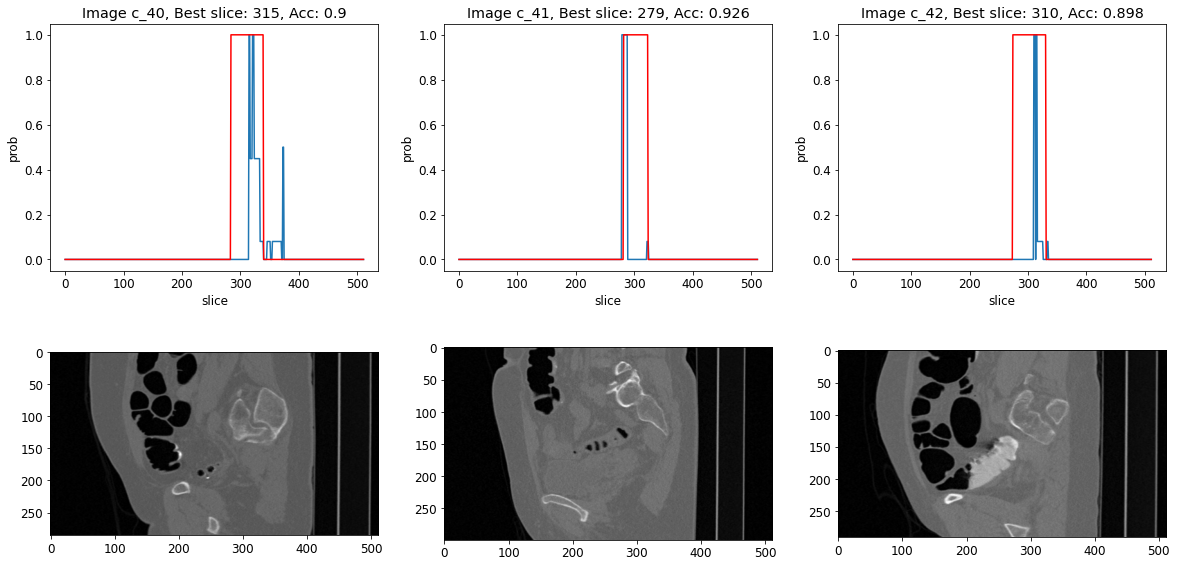

In [8]:
# tree
tree = train_classifier(g_images, g_lof, True,'dtree')

c_list = ['c_40','c_41','c_42']

plt.figure(figsize=(20,10))
for i in range(3):
    X_test = c_images[i]
    y_test = c_lof[i]
    y_preds, y_preds_proba = left_obturator_foramen_selection(X_test, tree, True, y_test)
    best = np.argmax(y_preds)
    acc = metrics.accuracy_score(y_test, y_preds)
    plt.subplot(2,3,i+1)
    plt.plot(y_preds_proba[:,1])
    plt.plot(y_test,'r')#,alpha=0.3)
    plt.xlabel('slice')
    plt.ylabel('prob')
    plt.title('Image '+c_list[i]+ ', Best slice: '+str(best)+', Acc: '+str(round(acc,3)))
    print('Confusion matrix of :'+c_list[i])
    print(metrics.confusion_matrix(y_test, y_preds))
    print('And accuracy of: '+str(acc))
    plt.subplot(2,3,i+4)
    plt.imshow(np.flipud(X_test[:,:,best]),cmap='gray')